In [24]:

import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# ***Loding the required libraries***

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ***Dataset***

In [26]:
df = pd.read_csv('/home/sarthak/archive (3)/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df_train = df.copy()
df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# ***EDA***

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [29]:
df_train.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df_train.shape

(10000, 14)

In [9]:
df_train.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df_train['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
sc = StandardScaler()
df_train[['CreditScore', 'Balance', 'Age', 'EstimatedSalary']] = sc.fit_transform(
    df_train[['CreditScore', 'Balance', 'Age', 'EstimatedSalary']]
)

oe = OneHotEncoder(sparse_output=False, drop=None) 
encoded_data = oe.fit_transform(df_train[['Geography', 'Gender']])

encoded_df = pd.DataFrame(
    encoded_data,
    columns=oe.get_feature_names_out(['Geography', 'Gender']),
    index=df_train.index
)

df_train = pd.concat([df_train.drop(columns=['Geography', 'Gender']), encoded_df], axis=1)

In [12]:
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,1.0,0.0,0.0,1.0,0.0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0.0,0.0,1.0,1.0,0.0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,1.0,0.0,0.0,1.0,0.0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,1.0,0.0,0.0,1.0,0.0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0.0,0.0,1.0,1.0,0.0


# ***Visualization***

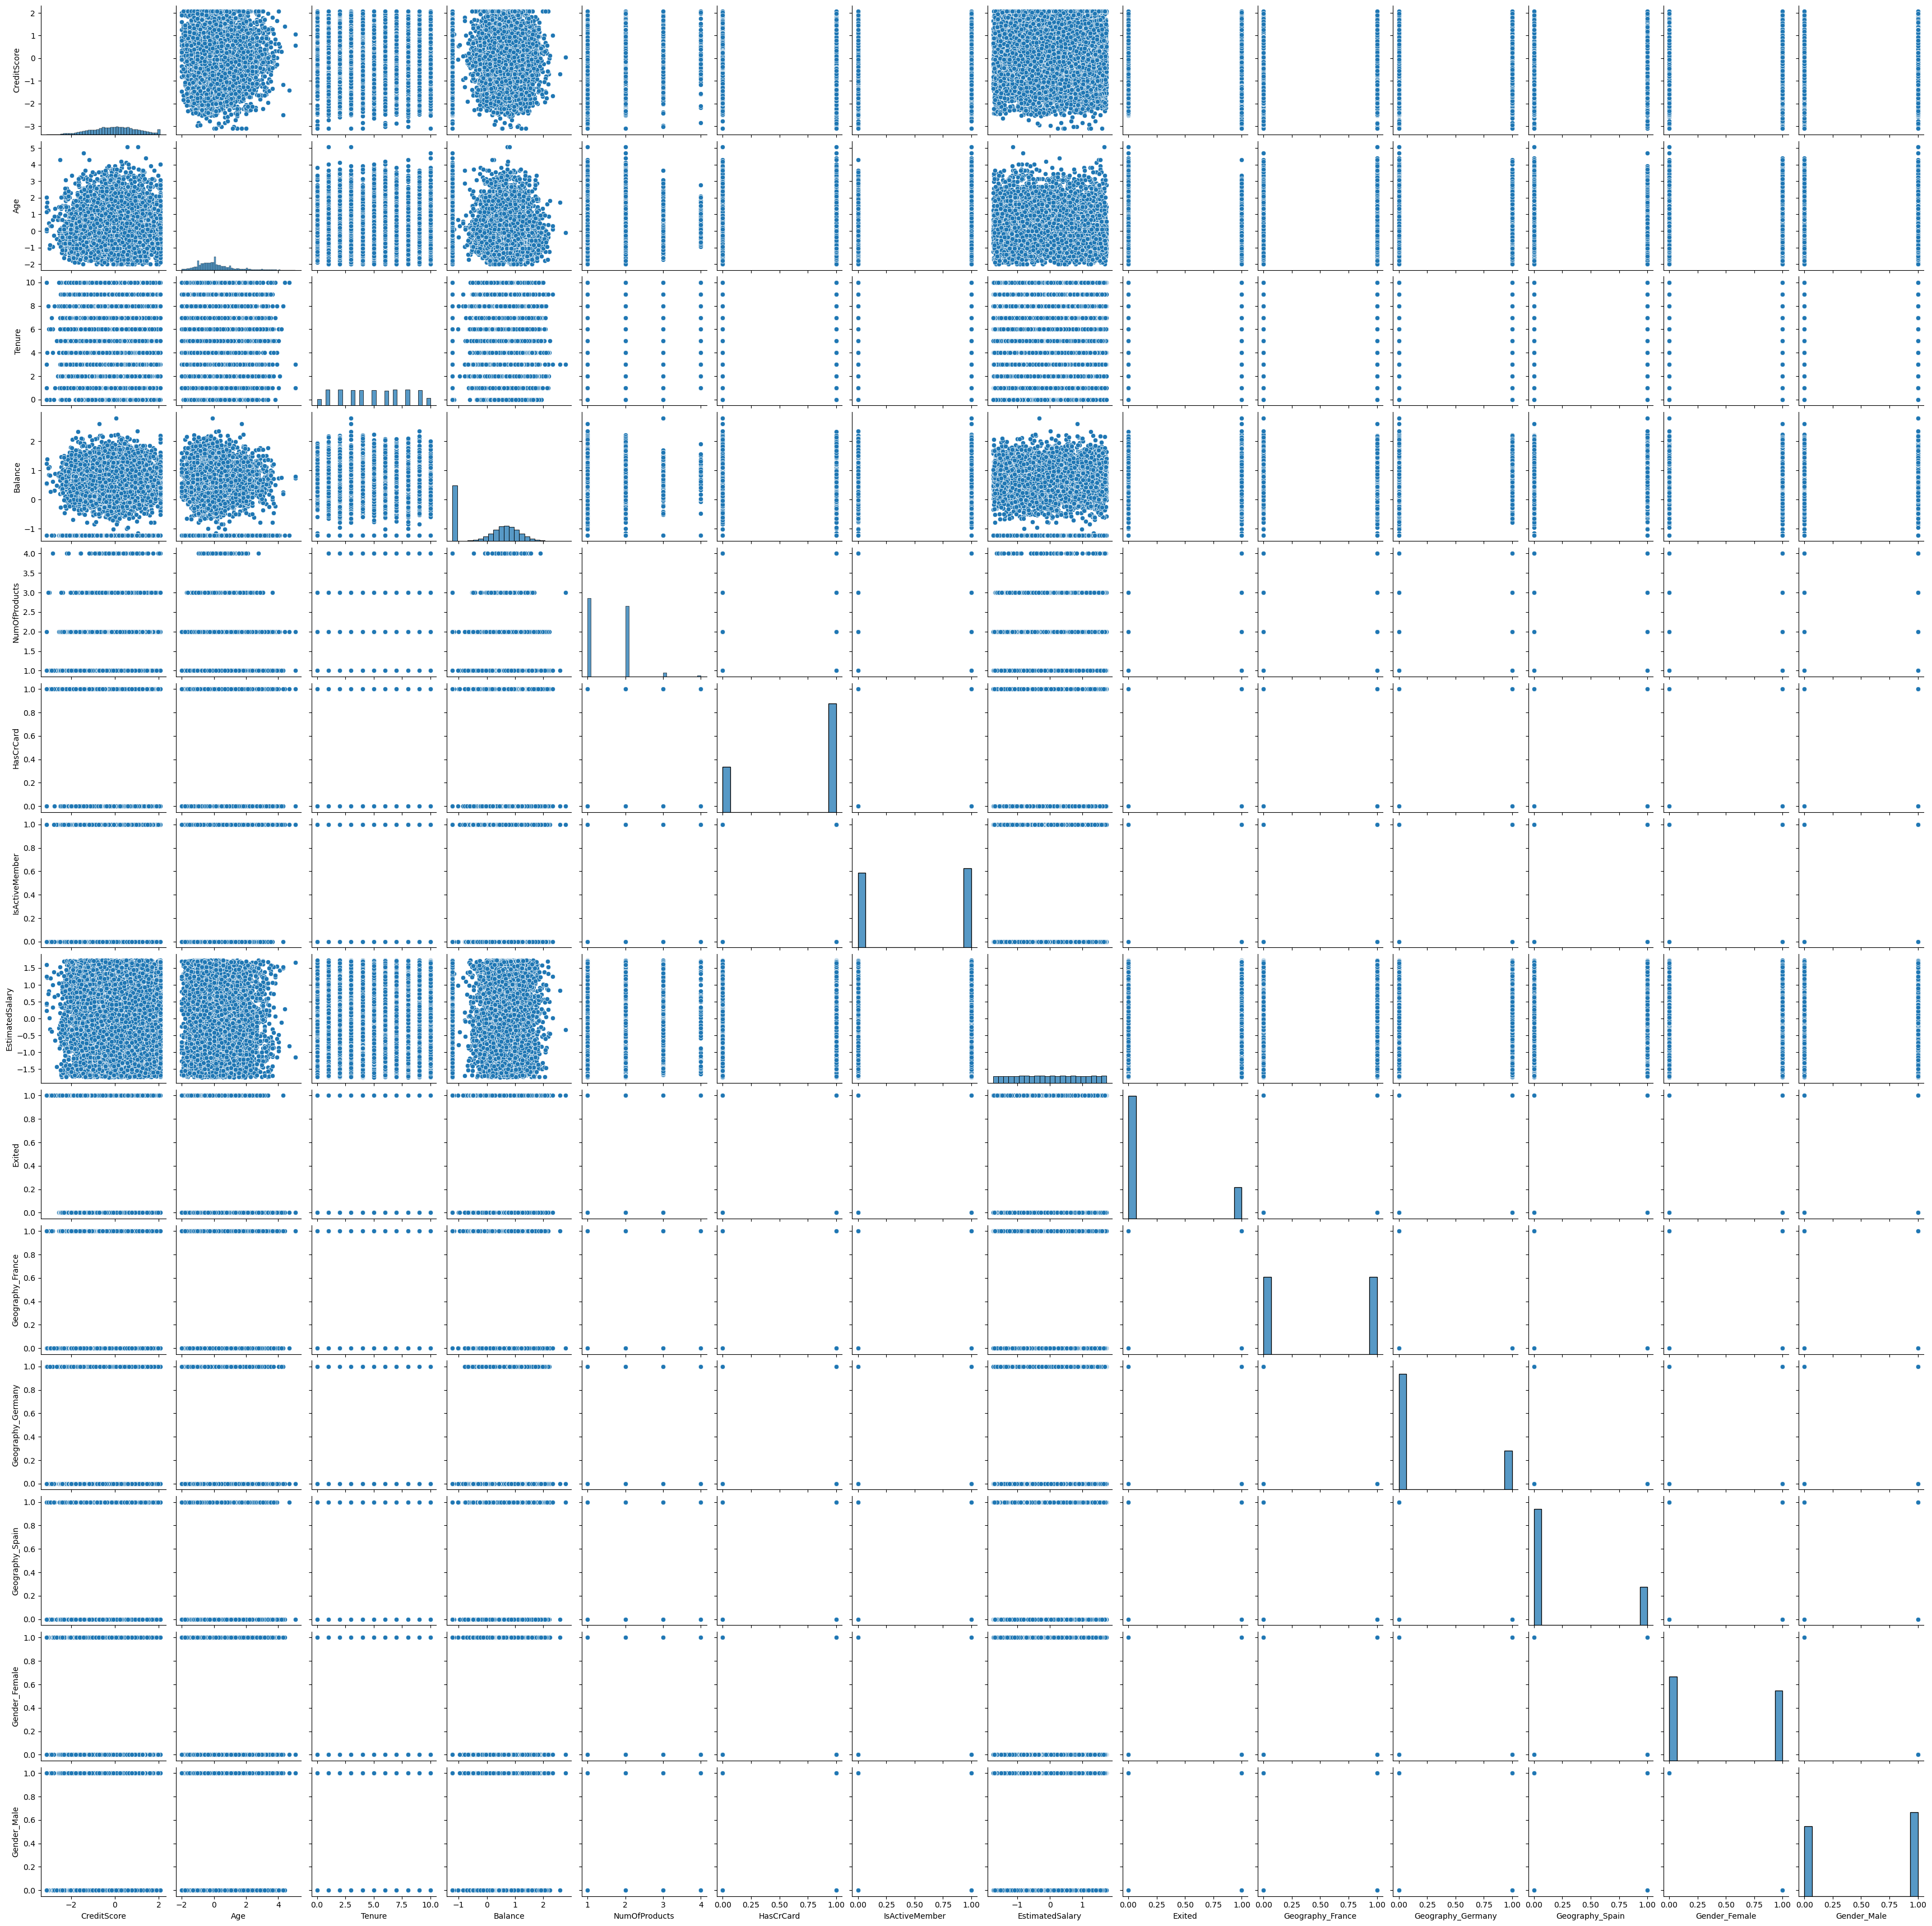

In [13]:
sns.pairplot(df_train)
plt.show()

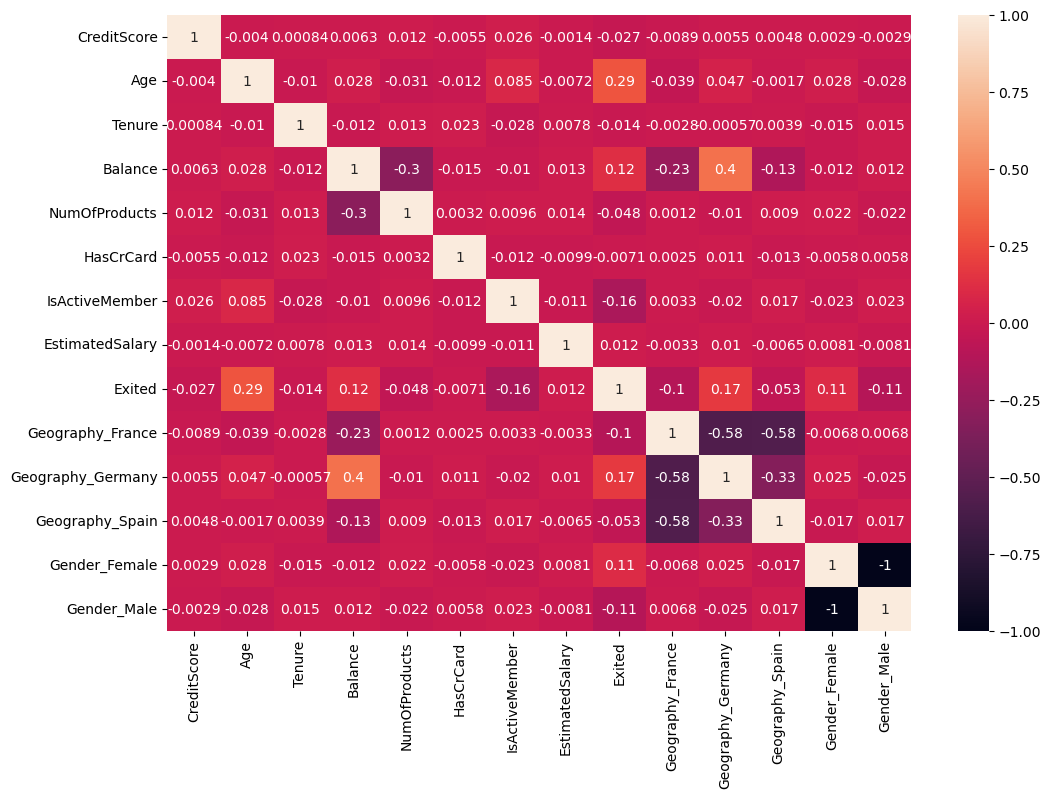

In [14]:
corr_mat = df_train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot = True)
plt.show()

# ***Model Training and Prediction***

In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [16]:
x = df_train.drop(columns=['Exited'])
y = df_train['Exited']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, test_size=0.2)

In [17]:
rf = RandomForestClassifier(random_state=25, n_jobs=1)
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)

In [18]:
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8655

In [19]:
print(classification_report(y_test, y_predict, target_names = ['Not Exited', 'Exited']))

              precision    recall  f1-score   support

  Not Exited       0.88      0.97      0.92      1607
      Exited       0.77      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000



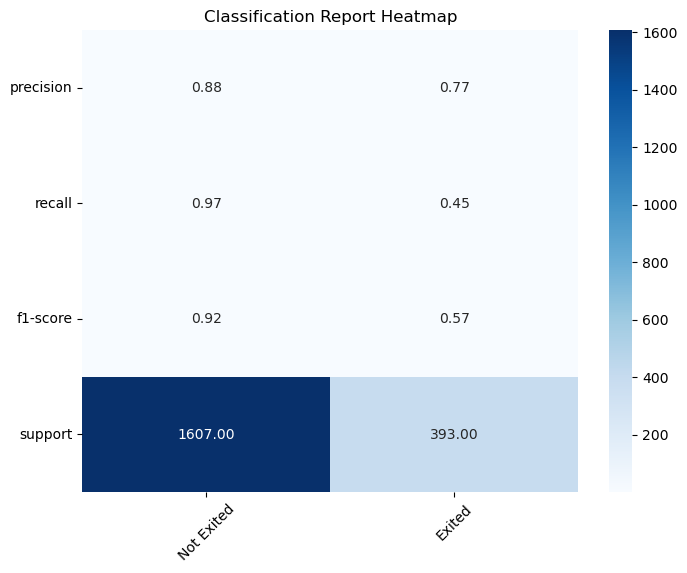

In [20]:
report = classification_report(y_test, y_predict, target_names=['Not Exited', 'Exited'], output_dict=True)

report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-3, :].T, annot=True, cmap='Blues', fmt='.2f')  # Skip 'accuracy', 'macro avg', etc.

plt.title('Classification Report Heatmap')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

# ***Submisson File***

In [21]:
predicted_output = rf.predict(x)

submission_df = pd.DataFrame({
    'id' : df['RowNumber'],
    'predicted_output' : predicted_output
})

submission_df.head()

,id,predicted_output
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [23]:
submission_df.to_csv('/home/sarthak/submission.csv', index=False)
print("submission.csv created successfully!")

submission.csv created successfully!
